# Clasificación Multiclase

Es cuando el modelo debe asignar una de tres o más clases.
Ejemplos:
- Calificación de un examen => *Desaprobado (0-10), Regular (11-15), Excelente (16-20)*.
- Reconocimiento de imágenes => *gato, perro, pájaro*.
- Diagnóstico médico => *sano, leve, grave*

## Scikit-Learn multiclase
Implementa la Regresión Logpistica Multiclase con dos enfoques principales:
- OvR (One-vs-Rest/Uno contra el Resto)
    - Para cada clase entrena un clasificador binario que distingue esa clase vs todas las demás.
    - Ejemplo con 3 clases:
        - Modelo 1: Clase A vs (B + C)
        - Modelo 2: Clase B vs (A + C)
        - Modelo 3: Clase C vs (A + B)
    - Predicción: se toma la clase con mayor probabilidad
- Multinominal (Softmax)
    - Un solo modelo aprende todas las clases al mismo tiempo.
    - Usa la función Softmax para producir probabilidades normalizadas para cada clase.
    - Más recomendado cuando se espera que las clases estén balanceadas y se relacionen entre si
## Ejemplo con notas de alumnos

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 
data = {
    "Horas": [1,2,3,4,5,6,7,8,9,10,11,12],
    "Notas": [6,8,10,12,13,14,15,16,17,18,19,20]
}

df = pd.DataFrame(data)

# Clasificacion en categorias
def categorizar(nota):
    if nota<=10:
        return 0
    elif nota <= 15:
        return 1
    else:
        return 2
    
df["Categoria"] = df["Notas"].apply(categorizar)
print(df)

# Variables
X = df[["Horas"]]
y = df["Categoria"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Modelo
modelo = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=1000)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

print("Matriz de confusion:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

    Horas  Notas  Categoria
0       1      6          0
1       2      8          0
2       3     10          0
3       4     12          1
4       5     13          1
5       6     14          1
6       7     15          1
7       8     16          2
8       9     17          2
9      10     18          2
10     11     19          2
11     12     20          2
Matriz de confusion:
 [[1 0]
 [0 3]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## Parámetro multi_class en LogisticRegression

```python
LogisticRegression(multi_class="ovr")
LogisticRegression(multi_class="multinomial")
LogisticRegression(multi_class="auto")

```
- 'ovr': One-vs-Rest, más simple, funciona siempre.
- 'multinomial': usa Softmax, requiere solvers que lo soporten (saga, lbfgs. newton-cg).
- 'auto': selecicona automáticamente: si el solver soporta multinomial lo usa sino ovr

## Parámetro solver
El solver es el algoritmo de optimización que entrena la regresión logística. Opciones:
- 'liblinear' rápido. pero solo soporta binario o OvR
- 'lbfgs' recomendado para multiclase (soporta multinomial)
- 'sag' y 'saga' buenos para datasets grandes, soportan multinomial.
- 'newton-cg' soporta multinomial
 
## Métricas en multiclase
- Accuracy: porcentaje correcto (puede ser engañoso si hy desbalance)
- Matriz de confusión: musetra errores por clase
- Precisión, Recall, F1: se calculan para cada clase
- Promedios (average):
    - macro: promedio simple de todas las clases (no importa el tamaño de cada clase)
    - weighted: promedio ponderado según número de ejemplos por clase
    - micro: global, suma TP, FP,FN y calcula métricas

## Visualización de matriz de confusión

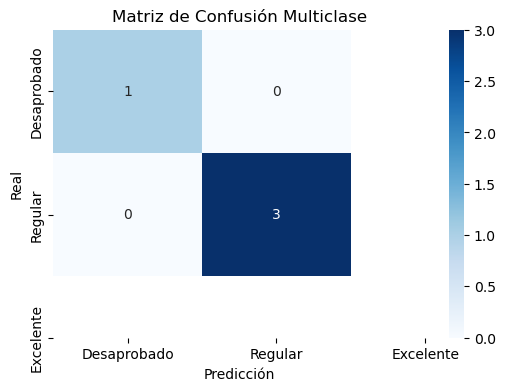

In [5]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Desaprobado", "Regular", "Excelente"],
            yticklabels=["Desaprobado", "Regular", "Excelente"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Multiclase")
plt.show()

## Ejemplo Guiado con Dataset Real (Iris)

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Cargar dataset
iris = load_iris()
X = iris.data  # características: largo sépalo, ancho sépalo, largo pétalo, ancho pétalo
y = iris.target # clases: 0=setosa, 1=versicolor, 2=virginica

# 2. Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# 3. Entrenar modelo multiclase (Softmax)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# 4. Predicciones
y_pred = model.predict(X_test)

# 5. Reporte
print("Matriz de confusión:\n" , confusion_matrix(y_test, y_pred))
print("\nReporte de clasificacion:\n", classification_report(y_test,y_pred, target_names=iris.target_names))

Matriz de confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificacion:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


- load_iris(): carga dataset Iris.
- X = iris.data: 150 filas × 4 columnas de medidas de flores.
-  = iris.target: etiquetas (0,1,2).
- train_test_split: 70% entrenamiento, 30% prueba.
- LogisticRegression(multi_class='multinomial', solver='lbfgs'):
- multi_class='multinomial': activa Softmax.
- solver='lbfgs': compatible con multinomial.
- max_iter=200: más iteraciones para asegurar convergencia.
- fit: entrena el modelo.
- predict: genera predicciones.
- confusion_matrix: errores por clase.
- classification_report: accuracy, precision, recall y F1 por clase.

## Tarea
1. Cargar dataset Wine
2. Dividir en train/test
3. Entrenar un modelo con `multi_class='ovr'` y `solver='liblinear'`.
4. Evaluar con matriz de confusión y reporte de clasificación
5. Comparar resultados con `multi_class='multinomial'` y `solver='lbfgs'`


In [16]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# 1.
wine = load_wine()
X = wine.data
y = wine.target
# 2.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# 3.
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 4.
print("Matriz de confusión:\n",confusion_matrix(y_test,y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=wine.target_names))


# 5. 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Matriz de confusión:\n",confusion_matrix(y_test,y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=wine.target_names))


Matriz de confusión:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Reporte de Clasificación:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Matriz de confusión:
 [[18  1  0]
 [ 0 21  0]
 [ 0  0 14]]

Reporte de Clasificación:
               precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki